##### Dataset

In [3]:
# fruits.zip
# location: https://mitu.co.in/dataset

##### Import the libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

##### Create image data generator object

In [8]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [9]:
test_datagen = ImageDataGenerator(rescale = 1/255)

##### Read the images

In [11]:
train = train_datagen.flow_from_directory('dataset/training_set',
                                          target_size = (64, 64),
                                          class_mode = 'binary')

Found 13 images belonging to 2 classes.


In [13]:
train.filenames

['apple/1.jpg',
 'apple/2.jpeg',
 'apple/3.jpeg',
 'apple/4.jpeg',
 'apple/5.jpg',
 'apple/6.jpg',
 'apple/7.jpg',
 'orange/1.jpeg',
 'orange/2.jpg',
 'orange/3.jpeg',
 'orange/4.jpeg',
 'orange/5.jpg',
 'orange/6.jpg']

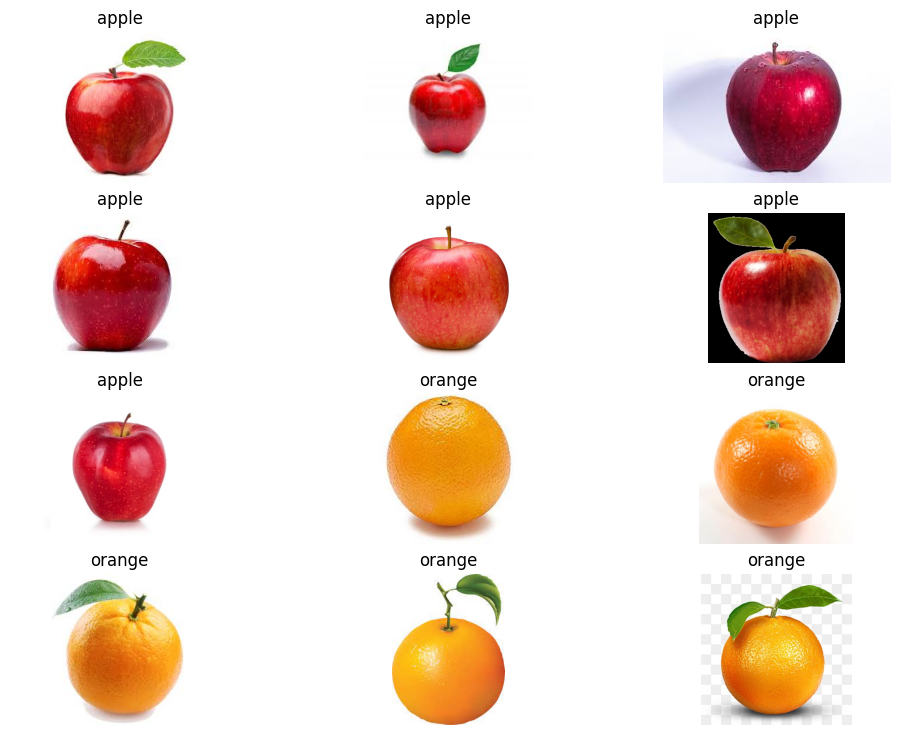

In [23]:
i = 1
plt.figure(figsize=(12,9))
for fname in train.filenames:
    if i == 13:
        break
    img = plt.imread(train.directory + "/"+fname)
    plt.subplot(4,3,i)
    plt.axis('off')
    i+=1
    plt.title(fname.split('/')[0])
    plt.imshow(img)

In [24]:
test = test_datagen.flow_from_directory('dataset/test_set',
                                          target_size = (64, 64),
                                          class_mode = 'binary')

Found 6 images belonging to 2 classes.


##### Build the CNN model

In [26]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), 
                 input_shape=(64,64,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 16)                2

##### Compile the model

In [30]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

In [32]:
train.class_indices

{'apple': 0, 'orange': 1}

##### Train the model

In [34]:
model.fit(train, epochs = 20, validation_data = test)

Epoch 1/20
1/1 [==============================] - 1s 742ms/step - loss: 0.6927 - accuracy: 0.5385 - val_loss: 0.6741 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 122ms/step - loss: 0.6490 - accuracy: 0.5385 - val_loss: 0.6418 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 85ms/step - loss: 0.6310 - accuracy: 0.4615 - val_loss: 0.6233 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 86ms/step - loss: 0.6086 - accuracy: 0.4615 - val_loss: 0.6029 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 126ms/step - loss: 0.5777 - accuracy: 0.5385 - val_loss: 0.5791 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 98ms/step - loss: 0.5534 - accuracy: 0.6923 - val_loss: 0.5523 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 0s 108ms/step - loss: 0.5234 - accuracy: 0.7692 - val_loss: 0.5226 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=======

##### Predict the class of unseen data

In [56]:
import cv2
img = plt.imread('dataset/sample2.jpg')

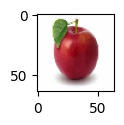

In [57]:
img = cv2.resize(img,(64,64))
plt.figure(figsize=(1,1))
plt.imshow(img)

In [60]:
img = img.reshape(1,64,64,3)
round(model.predict(img)[0][0],0)

1/1 [==============================] - 0s 15ms/step


0.0

In [59]:
train.class_indices

{'apple': 0, 'orange': 1}